In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

from datetime import datetime
from datetime import date

## Catboost

In [11]:
df_model = pd.read_csv("../inter_data/processed_catboost.csv")
df_model = df_model[[col for col in df_model.columns if "Unnamed" not in col]]


In [12]:
df_model

,cm_cd,IncomePA,cm_occup,E2Channel,IsKarvy,KRA YN,age,months_since_last_login,months_since_last_trade,dp_holding,total_logins_one_year,total_trades_one_year,target
0,10501992,1_5L,S,others,0,N,29.0,1.533705,17.796872,NaN,7.0,0.0,0
1,11154521,<=1L,P,CAT,0,N,23.0,132.000000,132.000000,0.0,0.0,0.0,0
2,SHIRAZUI,5_10L,P,CAT,0,Y,21.0,6.133384,0.515198,0.0,13.0,1.0,1
3,11975396,1_5L,S,CAT,0,N,44.0,132.000000,132.000000,0.0,0.0,0.0,0
4,MSHAHRO7,<=1L,S,CAT,0,N,22.0,20.359548,132.000000,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62877,92516982,1_5L,S,CAT,0,N,35.0,132.000000,132.000000,0.0,0.0,1.0,1
62878,17482977,5_10L,P,CAT,0,N,72.0,0.515198,0.745183,0.0,1400.0,56.0,1
62879,70629679,<=1L,S,CAT,0,Y,19.0,0.778038,0.810892,0.0,6.0,1.0,1
62880,114847,others,others,Brp,0,N,121.0,132.000000,132.000000,NaN,0.0,0.0,0


In [13]:


df_model["target"].value_counts()



1    33386
0    29496
Name: target, dtype: int64

In [14]:
df_model.describe()



,IsKarvy,age,months_since_last_login,months_since_last_trade,dp_holding,total_logins_one_year,total_trades_one_year,target
count,62882.000000,62882.000000,62882.000000,62882.000000,5.411000e+04,62882.000000,62882.000000,62882.000000
mean,0.011148,36.045991,51.851549,61.845675,5.472914e+04,216.101523,63.350545,0.530931
std,0.104994,22.198628,61.942209,63.220364,1.249243e+06,908.747005,763.461060,0.499046
min,0.000000,1.000000,0.515198,0.515198,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.778042,1.533705,0.000000e+00,0.000000,0.000000,0.000000
50%,0.000000,29.000000,5.607705,13.657154,0.000000e+00,6.000000,0.000000,1.000000
75%,0.000000,40.000000,132.000000,132.000000,0.000000e+00,43.000000,1.000000,1.000000
max,1.000000,121.000000,132.000000,235.854738,1.651739e+08,53532.000000,89876.000000,1.000000


In [15]:
pd.DataFrame(df_model.nunique()).rename(columns = {0: "num_unique"})

,num_unique
cm_cd,57317
IncomePA,6
cm_occup,6
E2Channel,6
IsKarvy,2
KRA YN,2
age,96
months_since_last_login,2043
months_since_last_trade,3224
dp_holding,4678


In [16]:
cat_features = ["KRA YN", "IsKarvy", "cm_occup", "IncomePA", "E2Channel"]
df_model["IsKarvy"] = df_model["IsKarvy"].astype(int)

df_model = df_model.dropna()

X = df_model.drop("target", axis=1)
y = df_model["target"]


In [17]:
X.to_csv("../inter_data/X.csv")
y.to_csv("../inter_data/y.csv")

In [18]:
del X["cm_cd"]

In [19]:
X

,IncomePA,cm_occup,E2Channel,IsKarvy,KRA YN,age,months_since_last_login,months_since_last_trade,dp_holding,total_logins_one_year,total_trades_one_year
1,<=1L,P,CAT,0,N,23.0,132.000000,132.000000,0.0,0.0,0.0
2,5_10L,P,CAT,0,Y,21.0,6.133384,0.515198,0.0,13.0,1.0
3,1_5L,S,CAT,0,N,44.0,132.000000,132.000000,0.0,0.0,0.0
4,<=1L,S,CAT,0,N,22.0,20.359548,132.000000,0.0,0.0,0.0
5,<=1L,S,CAT,0,Y,42.0,0.515198,0.810892,0.0,93.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...
62876,5_10L,P,CAT,0,Y,27.0,1.106591,132.000000,0.0,10.0,0.0
62877,1_5L,S,CAT,0,N,35.0,132.000000,132.000000,0.0,0.0,1.0
62878,5_10L,P,CAT,0,N,72.0,0.515198,0.745183,0.0,1400.0,56.0
62879,<=1L,S,CAT,0,Y,19.0,0.778038,0.810892,0.0,6.0,1.0


In [20]:

# train test split
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=0)


In [21]:


from catboost import CatBoostClassifier

cat_clf = CatBoostClassifier(
    iterations=50,
    random_seed=42,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy', 'Recall'], 
    loss_function='MultiClass'
    
)


cat_clf.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_val, y_val),
    verbose=True,
    plot=True, 
    
)



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.5257582	test: 0.5299944	best: 0.5299944 (0)	total: 201ms	remaining: 9.87s
1:	learn: 0.4624014	test: 0.4671727	best: 0.4671727 (1)	total: 241ms	remaining: 5.79s
2:	learn: 0.4367370	test: 0.4416150	best: 0.4416150 (2)	total: 282ms	remaining: 4.42s
3:	learn: 0.4092614	test: 0.4154566	best: 0.4154566 (3)	total: 321ms	remaining: 3.69s
4:	learn: 0.3900441	test: 0.3975166	best: 0.3975166 (4)	total: 385ms	remaining: 3.47s
5:	learn: 0.3720153	test: 0.3781644	best: 0.3781644 (5)	total: 456ms	remaining: 3.35s
6:	learn: 0.3645551	test: 0.3701016	best: 0.3701016 (6)	total: 520ms	remaining: 3.2s
7:	learn: 0.3544823	test: 0.3613163	best: 0.3613163 (7)	total: 563ms	remaining: 2.95s
8:	learn: 0.3509058	test: 0.3574071	best: 0.3574071 (8)	total: 634ms	remaining: 2.89s
9:	learn: 0.3367441	test: 0.3424293	best: 0.3424293 (9)	total: 674ms	remaining: 2.7s
10:	learn: 0.3355639	test: 0.3411405	best: 0.3411405 (10)	total: 710ms	remaining: 2.52s
11:	learn: 0.3344651	test: 0.3402936	best: 0.3402936 (

## saving the model

In [22]:
try:
    !mkdir ../models
except:
    pass
cat_clf.save_model('../models/catboost_classifier')


The syntax of the command is incorrect.


# predicion and analysis

In [23]:
y_train_pred = cat_clf.predict(X_train)
train_result = pd.DataFrame({'Converted':y_train, 'Converted_prob':y_train_pred.reshape(len(y_train_pred)), "prospect_ID": y_train.index})

Text(0.5, 0, 'False Positive Rate')

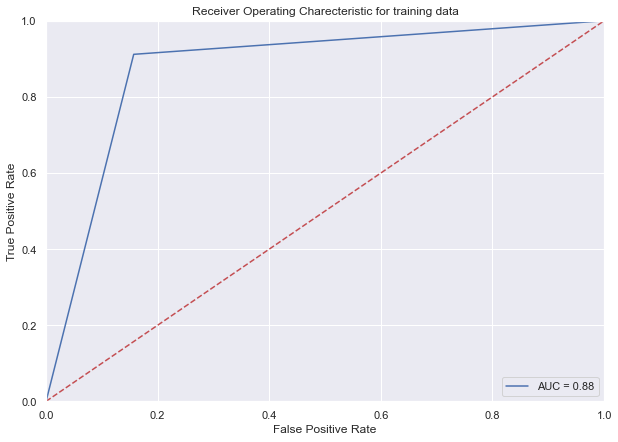

In [24]:
import sklearn.metrics as metrics
sns.set(rc={'figure.figsize':(10,7)})

fpr, tpr, threshold = metrics.roc_curve(y_train, y_train_pred)
roc_auc = metrics.auc(fpr, tpr)


plt.title("Receiver Operating Charecteristic for training data")
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = "lower right")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Text(0.5, 0, 'False Positive Rate')

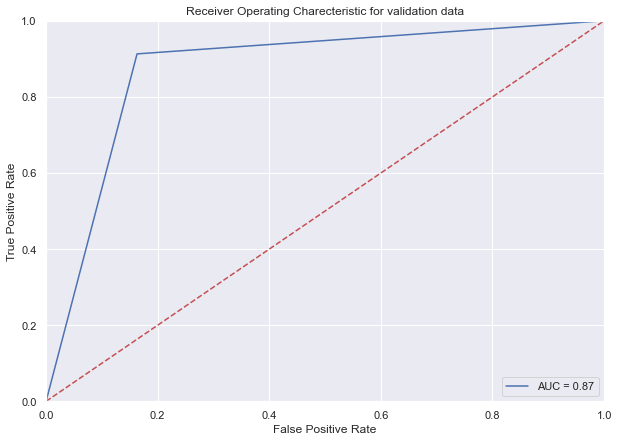

In [25]:
y_val_pred = cat_clf.predict(X_val)
val_result = pd.DataFrame({'Converted':y_val, 'Converted_prob':y_val_pred.reshape(len(y_val_pred)), "prospect_ID": y_val.index})

import sklearn.metrics as metrics
sns.set(rc={'figure.figsize':(10,7)})

fpr, tpr, threshold = metrics.roc_curve(y_val, y_val_pred)
roc_auc = metrics.auc(fpr, tpr)


plt.title("Receiver Operating Charecteristic for validation data")
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = "lower right")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [27]:
print("number of referrers model captured in the validation data:", len(val_result[(val_result["Converted"] == 1) & (val_result["Converted_prob"] == 1)]))
print("number of actual referrers in the validation data:", len(val_result[(val_result["Converted"] == 1)]))

number of referrers model captured in the validation data: 2969
number of actual referrers in the validation data: 3252
